**GROUP_101_3**
* Rocío Gilabert u198739
* Laura Juan     u199892
* Elena Barrio   u198735




# **Text Processing**

## **Imports**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# if you do not have 'nltk', the following command should work "python -m pip install nltk"
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import collections
from numpy import linalg as la
import json
import csv
import pandas as pd
import numpy as np
import re
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

## **Functions**

In [4]:
def build_terms(line):
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words("english"))

    ## Transform into lowercase
    line=  line.lower()
    #Remove urls
    line = re.sub(r'http[s]?://\S+', '', line)
    #remove apostrophes
    line = re.sub(r"'s\b", '', line)
    #Remove punctuations marks
    line = re.sub(r'[!"$%&()*+,-./:;<=>?[\]^_`{|}~#]', ' ', line)
    #Remove emojis, symbols, pictograms...
    line = re.sub(r"["
        "\U0001F600-\U0001F64F"
        "\U0001F300-\U0001F5FF"
        "\U0001F680-\U0001F6FF"
        "\U0001F1E0-\U0001F1FF"
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+", ' ', line)
    #Tokenize the text
    line =  line.split()
    #Remove stop-words
    line=[x for x in line if x not in stop_words]
    #Perform stemming
    line=[stemmer.stem(x) for x in line]

    return line

In [5]:
def extract_hashtags(content):
    # Find all words that begin with # symbol
    hashtags = re.findall(r'#\w+', content)
    return hashtags


In [6]:
def getCleanTweets(tweet):

  #Initialize an emtpy dictionary
  tweet_dict = {}

  # Get tweet ID
  tweet_dict['ID'] = tweet['id']

  # Get the tweet content
  tweet_dict['Tweet'] =tweet['content']

  # Get the clean tweet content
  tweet_dict['Procesed_Tweet'] = build_terms(tweet['content'])

  # Get the tweet date
  tweet_dict['Date'] = tweet['date']

  # Get the number of likes
  tweet_dict['Likes'] = tweet['likeCount']

  # Get the number of retweets
  tweet_dict['Retweets'] = tweet['retweetCount']

  # Get the url
  tweet_dict['URL'] = tweet['url']

  # Get the username
  tweet_dict['Username'] = '@' + tweet['user']['username']

  # Get the hashtags
  tweet_dict['Hashtags'] = extract_hashtags(tweet['content'])

  #Get if the user is verified or not
  tweet_dict['Verified'] = tweet['user']['verified']

  #Get the number of followers
  tweet_dict['Followers'] = tweet['user']['followersCount']

  return tweet_dict

## **Load Information**

In [7]:
json_path = '/content/drive/Shareddrives/Information Retrieval and Web Analytics/data/farmers-protest-tweets.json'
csv_path = '/content/drive/Shareddrives/Information Retrieval and Web Analytics/data/tweet_document_ids_map.csv'

In [8]:
# Load the data of the json file into a dictionary
def read_json_to_dict(json_to_trans):
  trans_to_dict = [json.loads(line) for line in open(json_to_trans, 'r')]
  return trans_to_dict

In [9]:
data_json = read_json_to_dict(json_path)
print(', '.join(data_json[0].keys()))


url, date, content, renderedContent, id, user, outlinks, tcooutlinks, replyCount, retweetCount, likeCount, quoteCount, conversationId, lang, source, sourceUrl, sourceLabel, media, retweetedTweet, quotedTweet, mentionedUsers


In [10]:
#Load the data of the csv file into a dictionary
def read_csv_to_dict(csv_to_trans):
  data_col_names = ['doc', 'id']
  csv_read = pd.read_csv(csv_to_trans, sep=",", names=data_col_names)
  trans_to_dict = csv_read.to_dict('records')
  return trans_to_dict

In [11]:
data_csv = read_csv_to_dict(csv_path)

## **Clean Tweets**

In [12]:
def process_tweets(data_json, data_csv):

    # Initialize the empty dictionary where we will store the process tweets
    tweets = {}

    # We will transform the list of dictionaries to a dictionary with key id
    csv_dict = {str(row['id']): row['doc'] for row in data_csv}


    for tweet in data_json:
        # We make sure that the tweet id from the json and csv file are the same type of variable
        tweet_id = str(tweet['id'])

        # We look for the id of the json file into the csv file
        if tweet_id in csv_dict:
            doc_id = csv_dict[tweet_id]
            # We use the getCleanTweets Function to clean each tweet of the function
            cleaned_tweet = getCleanTweets(tweet)
            # We add the cleaned tweet to the dictionary with the doc_id as the key

            tweets[doc_id] = cleaned_tweet

    return tweets

In [13]:
get_tweets = process_tweets(data_json, data_csv)

In [14]:
get_tweets['doc_1289']

{'ID': 1364392326110408704,
 'Tweet': '@Tractor2twitr Fight for grain 🌾is no fairy tale\nFarmer Revolution will not fail \nLet justice prevail \nFarmer are not for sale \n💚🌾🚜💚🚜🌾💚🌾🚜\n \n#ModiDontSellFarmers \n\n#FarmersProtest https://t.co/3gyCSVnJD8',
 'Procesed_Tweet': ['@tractor2twitr',
  'fight',
  'grain',
  'fairi',
  'tale',
  'farmer',
  'revolut',
  'fail',
  'let',
  'justic',
  'prevail',
  'farmer',
  'sale',
  'modidontsellfarm',
  'farmersprotest'],
 'Date': '2021-02-24T01:50:54+00:00',
 'Likes': 0,
 'Retweets': 0,
 'URL': 'https://twitter.com/TutSimran/status/1364392326110408704',
 'Username': '@TutSimran',
 'Hashtags': ['#ModiDontSellFarmers', '#FarmersProtest'],
 'Verified': False,
 'Followers': 24}

# **Exploratory Data Analysis**

## Top Words & Top Hashtags

In [ ]:
def plot_top_10(dic):
    # we order the dictionary by values in descending order and get the top 10
    top_10 = dict(sorted(dic.items(), key=lambda item: item[1], reverse=True)[:10])

    # We obtain the keys and the values
    keys = list(top_10.keys())
    values = list(top_10.values())

    # We create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(keys, values, color='magenta', alpha=0.7)
    plt.title('Top 10 ')
    plt.xlabel('Keys')
    plt.ylabel('Values')
    plt.xticks(rotation=45)  #We rotate x labels for better visibility
    plt.grid(axis='y')
    plt.tight_layout()  #Avoid overlap
    plt.show()

In [ ]:
def word_count(dic):
  words = {}
  #Here we count the frequency of each of the words of the procesed tweets
  for tweet in dic:
    for word in dic[tweet]['Procesed_Tweet']: #for each token
      if word in words: #if it has already appeared, add 1 to frequency
        words[word] += 1
      else: #it is the first appearance
        words[word] = 1

  #we order the dictionary of frequencies by values in descending order
  word_count = dict(sorted(words.items(), key = lambda item:item[1], reverse = True))
  return word_count

In [ ]:
frequency_words = word_count(get_tweets)
top_5_words = dict(list(frequency_words.items())[:5]) #we get the 5 most repeated words
for i, word in enumerate(top_5_words, 1):
  print(f"Top {i}: {word} --> {top_5_words[word]}")


Top 1: farmersprotest --> 50456
Top 2: farmer --> 17098
Top 3: india --> 7713
Top 4: support --> 6029
Top 5: protest --> 4802


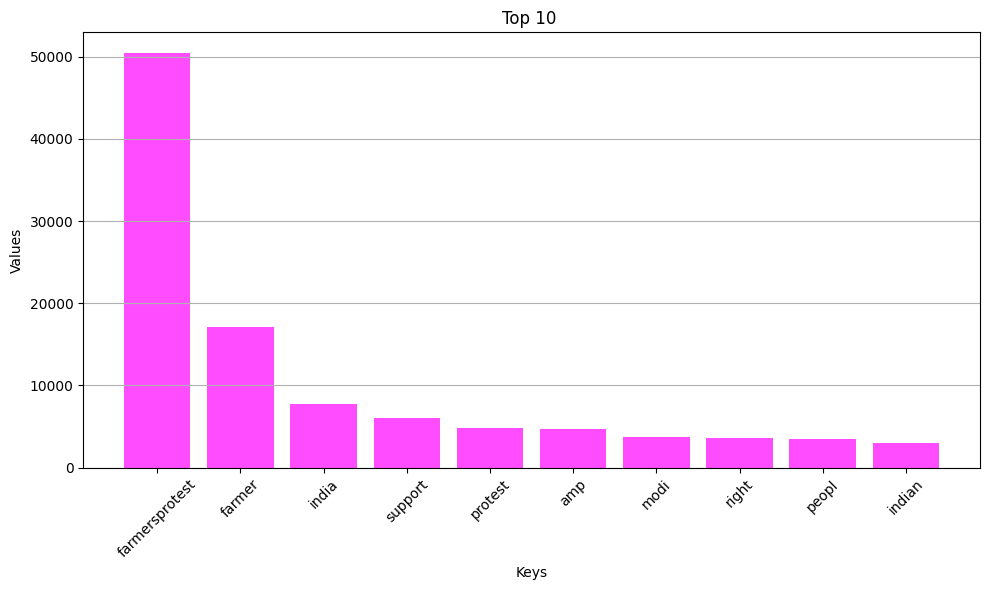

In [ ]:
plot_top_10(frequency_words)

In [ ]:
def hashtag_count(dic):
  hashtags = {}
  #Here we count the frequency of each of the hashtags
  for tweet in dic:
    for hashtag in dic[tweet]['Hashtags']:
      if hashtag in hashtags: #if it has already appeared, add 1 to frequency
        hashtags[hashtag] += 1
      else: #it is the first appearance
        hashtags[hashtag] = 1

  #we order the dictionary of frequencies by values in descending order
  hashtag_count = dict(sorted(hashtags.items(), key = lambda item:item[1], reverse = True))
  return hashtag_count

In [ ]:
frequency_hashtags = hashtag_count(get_tweets)
top_5_hashtags = dict(list(frequency_hashtags.items())[:5]) #we get the 5 most repeated hashtags
for i, hashtag in enumerate(top_5_hashtags, 1):
  print(f"Top {i}: {hashtag} --> {top_5_hashtags[hashtag]}")

Top 1: #FarmersProtest --> 45856
Top 2: #ReleaseDetainedFarmers --> 2430
Top 3: #farmersprotest --> 2305
Top 4: #FarmersMakeIndia --> 2129
Top 5: #IndiaBeingSilenced --> 2128


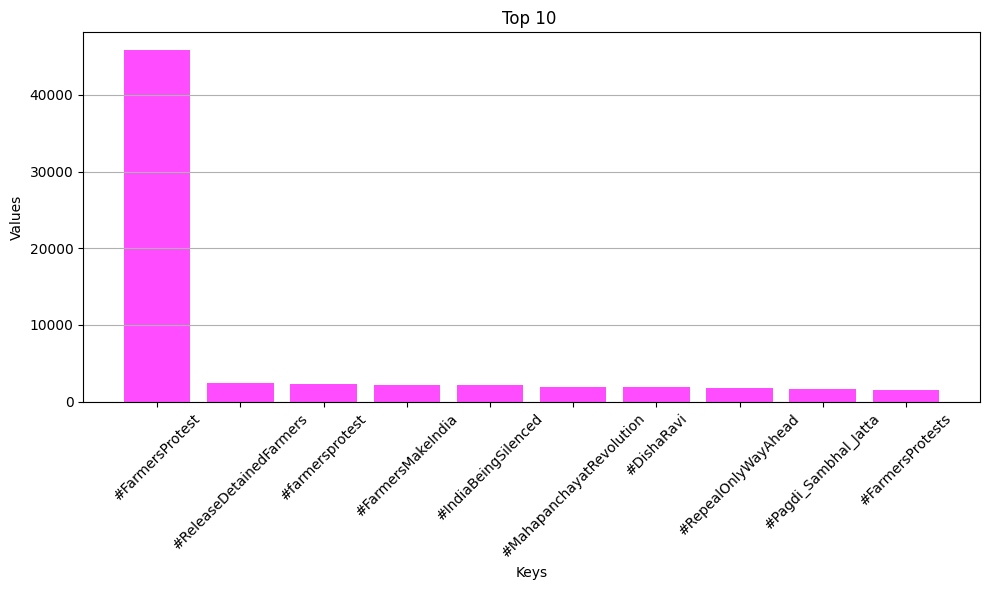

In [ ]:
plot_top_10(frequency_hashtags)

## Average Sentence length

In [ ]:
def avg_length(dic):
  sum = 0
  for tweet in dic: #for each tweet
    sum += len(dic[tweet]['Procesed_Tweet']) #sum the number of tokens
  return sum / len(dic)


In [ ]:
average_tweets_length = avg_length(get_tweets)
print('The average length of the tweets is', average_tweets_length)

The average length of the tweets is 14.685890685333169


## Most retweeted tweets

In [ ]:
def most_retweeted(dic):
  retweeted = {}
  for doc_id in dic:
    content = dic[doc_id]['Tweet'] #get the content of each tweet
    retweeted[content] = dic[doc_id]['Retweets'] #we create a dictionary with content: num_retweets
  #we order the dictionary by values in descending order
  retweeted = dict(sorted(retweeted.items(), key = lambda item:item[1], reverse = True))
  return retweeted

In [ ]:
retweeted_tweets = most_retweeted(get_tweets)
top_5_retweeted = dict(list(retweeted_tweets.items())[:5])
for tweet in top_5_retweeted:
  print('Nº of retweets: ', top_5_retweeted[tweet], '\n','Content: ', tweet)


Nº of retweets:  6164 
 Content:  There's a #FarmersProtest happening in Germany.

But the German Govt didn’t block their path with barbed wires, dig highways or label them Anti-National. And neither did the Govt declare it an ‘internal matter’ where others can’t comment. I guess that’s how democracies work. https://t.co/pZtigTgWT8
Nº of retweets:  4673 
 Content:  disha ravi, a 21-year-old climate activist, has been arrested by delhi police for sharing a toolkit @GretaThunberg  posted in support of the #farmersprotest. 

disha’s arrest is alarming and the world needs to pay attention. #freedisharavi

https://t.co/IYGsLpNjwZ
Nº of retweets:  3742 
 Content:  Disha Ravi broke down in court room and told judge that she had merely edited two lines in the toolkit and was supporting farmers. What is wrong in that? This is how this nation treats anyone who spreads awareness. #FarmersProtest
Nº of retweets:  3332 
 Content:  Farmers are so sweet. Y’all have to see this @AmandaCerny @rihanna 🖤

## Word Cloud

In [ ]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

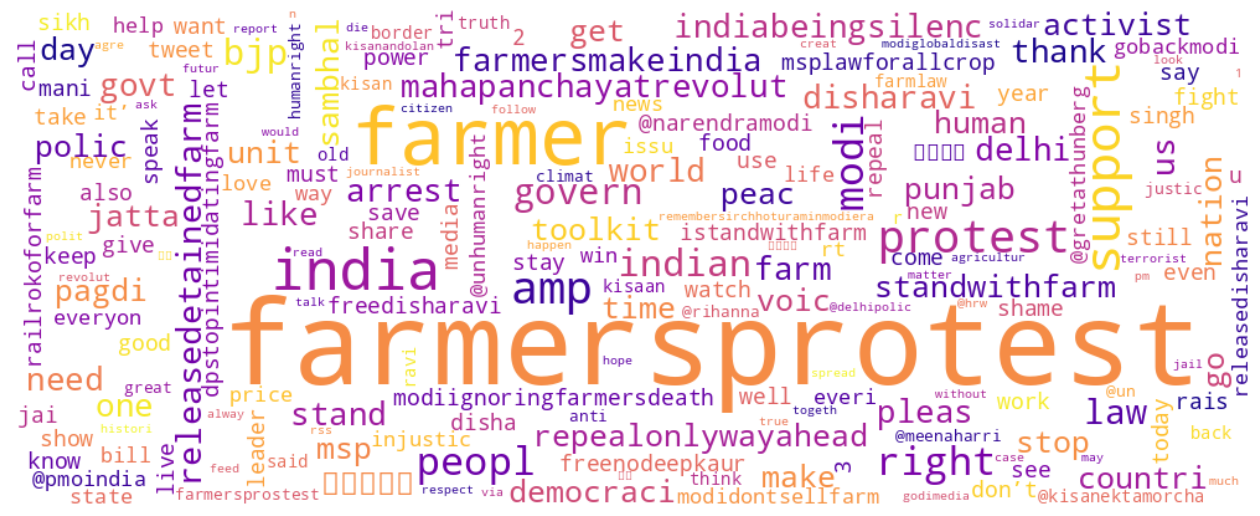

In [ ]:
# Generate the word cloud with the most frequent words
genre_wordcloud = WordCloud(width=1000, height=400, background_color='white', colormap= 'plasma')
genre_wordcloud.generate_from_frequencies(dict(frequency_words))

# Plot the word cloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

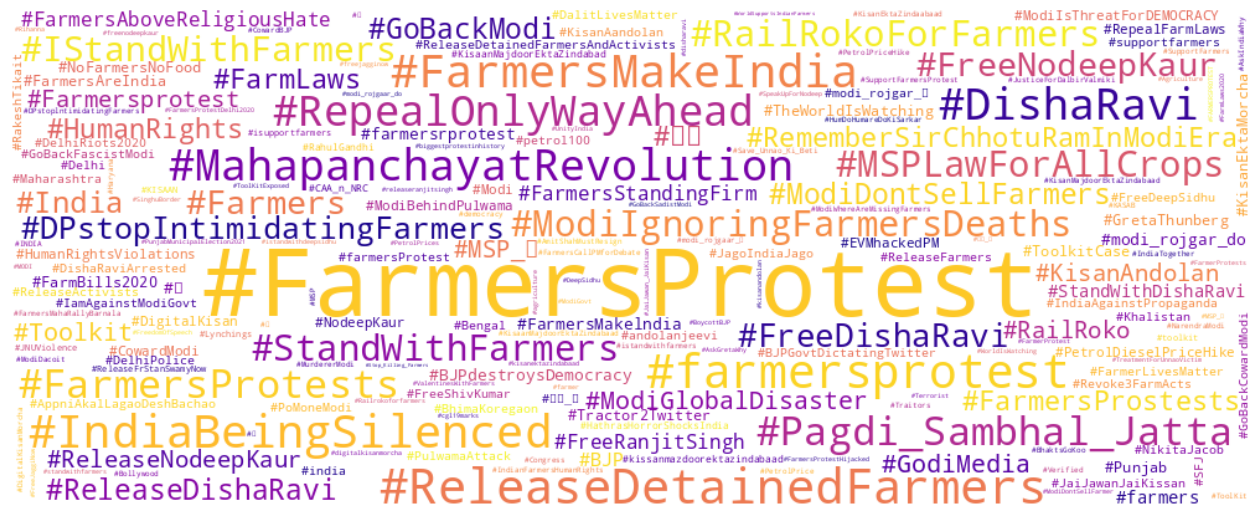

In [ ]:
# Generate the word cloud with the most frequent hashtags
genre_wordcloud = WordCloud(width=1000, height=400, background_color='white', colormap= 'plasma')
genre_wordcloud.generate_from_frequencies(dict(frequency_hashtags))

# Plot the word cloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Vocabulary Size

In [ ]:
#We use the dictionary of word frequencies
print("The vocabulary size of the pre-processed tweets is", len(frequency_words))
print("Average number of unique words per tweet:", round(len(frequency_words)/len(get_tweets), 3))

The vocabulary size of the pre-processed tweets is 38530
Average number of unique words per tweet: 0.796


## Most active users

In [ ]:
def most_active_users(dic):
  usernames = {}
  #Here we count the frequency of each of the usernames that posted a tweet
  for doc_id in dic:
    username = dic[doc_id]['Username'] #for each username that posted a tweet
    if username in usernames: #if it has already appeared, add 1 to frequency
      usernames[username] += 1
    else: #it is the first appearance
      usernames[username] = 1

  #we order the dictionary of frequencies by values in descending order
  usernames_count = dict(sorted(usernames.items(), key = lambda item:item[1], reverse = True))
  return usernames_count

In [ ]:
active_users = most_active_users(get_tweets)
top_5_users = dict(list(active_users.items())[:5]) #we get the 5 most repeated hashtags
for i, username in enumerate(top_5_users, 1):
  print(f"Top {i}: {username} --> posted {top_5_users[username]} tweets")

Top 1: @jot__b --> posted 679 tweets
Top 2: @shells_n_petals --> posted 489 tweets
Top 3: @KaurDosanjh1979 --> posted 423 tweets
Top 4: @DigitalKisanBot --> posted 368 tweets
Top 5: @ish_kayy --> posted 366 tweets


## Most used emojis

In [ ]:
def emoji_count(dic):
  #We compile all the emoji patterns used above in the build terms function
  emojis = re.compile(r"["
        "\U0001F600-\U0001F64F"
        "\U0001F300-\U0001F5FF"
        "\U0001F680-\U0001F6FF"
        "\U0001F1E0-\U0001F1FF"
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)

  emojis_count = {}
  for doc_id in dic:
    content = dic[doc_id]['Tweet'] #Get the whole content of each tweet
    find_emojis = emojis.findall(content) #Get the emojis that appear in the tweet

    for emoji in find_emojis:
      if len(emoji) != 1: #we are checking the case that appear more than one emoji together without spaces
        for i in range(len(emoji)):
          if emoji[i] in emojis_count:
            emojis_count[emoji[i]] += 1
          else:
            emojis_count[emoji[i]] = 1
      else: #we are checking when there is only one emoji
        if emoji in emojis_count:
          emojis_count[emoji] += 1
        else:
          emojis_count[emoji] = 1

  #we order the emojis frequencies by descending order
  mostused_emojis = dict(sorted(emojis_count.items(), key=lambda item: item[1], reverse=True))
  return mostused_emojis


In [ ]:
frequency_emojis = emoji_count(get_tweets)
top_10_emojis = dict(list(frequency_emojis.items())[:10]) #we get the 10 most repeated hashtags
for i, emoji in enumerate(top_10_emojis, 1):
  print(f"Top {i}: {emoji} --> {top_10_emojis[emoji]}")

Top 1: 🙏 --> 3508
Top 2: 🚜 --> 1687
Top 3: ️ --> 1611
Top 4: 🇳 --> 1525
Top 5: 🇮 --> 1520
Top 6: 🏻 --> 1311
Top 7: 🌾 --> 1059
Top 8: ✊ --> 1008
Top 9: 😂 --> 885
Top 10: ❤ --> 872


In [ ]:
r

# **Inverted Index**


In [15]:
#Function to have the tokens that correspond to each tweet
def get_token_tweets(dic):
  token_tweets = {}
  for doc_id in dic:
    token_tweets[doc_id] = dic[doc_id]['Procesed_Tweet']
  return token_tweets

In [16]:
clean_tweets = get_token_tweets(get_tweets)

In [17]:
def create_index(dic):
  index = {}
  title_index = {}

  for doc_id in dic: #for each document
    tokens = clean_tweets[doc_id] #we take the tokens
    title_index[doc_id] = dic[doc_id]['Username']

    # we iterate through the document tokens
    for token in tokens:
        if token in index: #if the token has already appeared, add the document
            index[token].append(doc_id)
        else: #add a new entry for the token
            index[token] = [doc_id]

  return index, title_index

In [18]:
index, title_index = create_index(get_tweets)
print(index['farmer'])

['doc_1', 'doc_5', 'doc_13', 'doc_14', 'doc_17', 'doc_22', 'doc_26', 'doc_41', 'doc_47', 'doc_59', 'doc_61', 'doc_61', 'doc_63', 'doc_66', 'doc_74', 'doc_74', 'doc_77', 'doc_79', 'doc_80', 'doc_86', 'doc_89', 'doc_97', 'doc_100', 'doc_101', 'doc_104', 'doc_104', 'doc_105', 'doc_107', 'doc_111', 'doc_112', 'doc_119', 'doc_122', 'doc_122', 'doc_125', 'doc_127', 'doc_129', 'doc_134', 'doc_138', 'doc_140', 'doc_142', 'doc_144', 'doc_151', 'doc_151', 'doc_153', 'doc_153', 'doc_161', 'doc_161', 'doc_180', 'doc_183', 'doc_188', 'doc_191', 'doc_195', 'doc_196', 'doc_204', 'doc_204', 'doc_204', 'doc_210', 'doc_210', 'doc_210', 'doc_211', 'doc_211', 'doc_219', 'doc_221', 'doc_223', 'doc_224', 'doc_240', 'doc_243', 'doc_244', 'doc_244', 'doc_249', 'doc_250', 'doc_252', 'doc_258', 'doc_259', 'doc_261', 'doc_267', 'doc_268', 'doc_271', 'doc_274', 'doc_275', 'doc_276', 'doc_276', 'doc_286', 'doc_308', 'doc_311', 'doc_314', 'doc_314', 'doc_326', 'doc_326', 'doc_328', 'doc_328', 'doc_331', 'doc_331', 

In [19]:
def search(query, index):
  query = build_terms(query)
  # we initialize tweets with the documents were the first query term appears
  if query[0] in index:
    tweets = set(index[query[0]])
  else:
    return []  # if the first term has no matching documents, return an empty list
  for word in query[1:]: #for each subsequent term
    try:
      term_tweet = index[word] #find its documents
      tweets = tweets & set(term_tweet) #compute an AND to know the documents were all terms appear
    except:
      pass
  tweets = list(tweets)
  return tweets


In [20]:
print("Insert your query:\n")
query = input()
tweets = search(query, index)
for doc_id in tweets[:10]:
  print("doc_id =", doc_id," - user_id",  title_index[doc_id])

Insert your query:

farmer protest
doc_id = doc_27136  - user_id @chouhan_jasmeet
doc_id = doc_20864  - user_id @rodude57
doc_id = doc_47158  - user_id @the_newsmen
doc_id = doc_9545  - user_id @saahilmenghani
doc_id = doc_12912  - user_id @IWF_Writers
doc_id = doc_20589  - user_id @wepunjabinews
doc_id = doc_23337  - user_id @Gurpreett_singh
doc_id = doc_22877  - user_id @MurliMenon6
doc_id = doc_41851  - user_id @Tractor2twitr
doc_id = doc_44034  - user_id @RaviSinghKA


## **TF-IDF**

In [21]:
def inverted_index_tfidf(query, inverted_index, total_tweets, clean_tweets):
  terms = build_terms(query)
  tweets_scores = defaultdict(float) #dictionary to store doc_id -> score
  common_docs = search(query, inverted_index) #we find the list of common documents for all the words of the query

  for term in terms: #for each word
    if term in inverted_index:
      df = len(inverted_index[term]) # we compute document frequency (DF) that is the number of documents containing the term
      idf = np.round(np.log(total_tweets/df), 4) #we compute IDF with the formula

      for doc_id in common_docs: #for each document that conatins the query
        term_frequencies_doc = defaultdict(int)
        term_frequency = clean_tweets[doc_id].count(term)   #term frequency of the term in the document

        #####PARTE NUEVA
        for word in clean_tweets[doc_id]:
          term_frequencies_doc[word] += 1

        norm = math.sqrt(sum(freq**2 for freq in term_frequencies_doc.values()))
        tf = np.round(term_frequency / norm, 4) #we compute the tf term_frequency/normalized term frequencies in that document
        #######

        #tf = np.round(term_frequency / len(clean_tweets[doc_id]), 4) #we compute the tf term_frequency/words in that document
        # we compute tf-idf and add it to the tweet score
        tweets_scores[doc_id] += tf * idf

  #we order the tweet scores in descending order by score
  ranked_tweets = dict(sorted(tweets_scores.items(), key=lambda x: x[1], reverse=True))

  return ranked_tweets



### Query 1

In [22]:
query_1 = "indian government"
tweets_1 = search(query_1, index) #documents were the query appears without ranking
for doc_id in tweets_1[:10]:
  print("doc_id =", doc_id," - user_id",  title_index[doc_id])
print("\n")
tfidf_resutls_1 = inverted_index_tfidf(query_1, index, len(get_tweets), clean_tweets) #documents were the query appears ranked by scores
top_10_results = list(tfidf_resutls_1.items())[:10] #we take top 10
for tweet_id, score in top_10_results:
    print(tweet_id, score)

doc_id = doc_2653  - user_id @preventcyberha1
doc_id = doc_40203  - user_id @chouhan_jasmeet
doc_id = doc_11703  - user_id @GkpMaverick
doc_id = doc_7212  - user_id @prabhjitbobby1
doc_id = doc_39228  - user_id @10veer_Kaur
doc_id = doc_27190  - user_id @Mdziyaulislam3
doc_id = doc_17324  - user_id @reet_kaurz
doc_id = doc_45909  - user_id @AndrabiNuzhat
doc_id = doc_34331  - user_id @ZAHIDKH967158
doc_id = doc_31955  - user_id @hashmi_adiba


doc_29545 2.8212
doc_31188 2.8212
doc_11484 2.8212
doc_38240 2.8212
doc_17769 2.8212
doc_15947 2.5351024499999997
doc_36211 2.52328128
doc_27778 2.52328128
doc_30422 2.52328128
doc_34728 2.52328128


### Query 2

In [23]:
query_2 = "support farmers"
tweets_2 = search(query_2, index) #documents were the query appears without ranking
for doc_id in tweets_2[:10]:
  print("doc_id =", doc_id," - user_id",  title_index[doc_id])
print("\n")
tfidf_resutls_2 = inverted_index_tfidf(query_2, index, len(get_tweets), clean_tweets) #documents were the query appears ranked by scores
top_10_results2 = list(tfidf_resutls_2.items())[:10] #we take top 10
for tweet_id, score in top_10_results2:
    print(tweet_id, score)

doc_id = doc_46186  - user_id @Pnjabanwidclass
doc_id = doc_25672  - user_id @ArvinderBhamra
doc_id = doc_640  - user_id @Be1Benipal
doc_id = doc_40275  - user_id @Rosiexn3
doc_id = doc_30753  - user_id @preety21132050
doc_id = doc_14193  - user_id @burnoutcandle
doc_id = doc_23211  - user_id @DigitalKisanBot
doc_id = doc_17486  - user_id @mani262002
doc_id = doc_34312  - user_id @Parmind91496181
doc_id = doc_9178  - user_id @Gurisin88254355


doc_43187 2.0831749999999998
doc_47423 1.96845345
doc_47396 1.96845345
doc_47382 1.96845345
doc_31878 1.96845345
doc_15877 1.96845345
doc_30210 1.91152138
doc_26697 1.8631917199999997
doc_22029 1.84137581
doc_8333 1.84137581


### Query 3

In [24]:
query_3 = "farmer protest"
tweets_3 = search(query_3, index) #documents were the query appears without ranking
for doc_id in tweets_3[:10]:
  print("doc_id =", doc_id," - user_id",  title_index[doc_id])
print("\n")
tfidf_resutls_3 = inverted_index_tfidf(query_3, index, len(get_tweets), clean_tweets) #documents were the query appears ranked by scores
top_10_results3 = list(tfidf_resutls_3.items())[:10] #we take top 10
for tweet_id, score in top_10_results3:
    print(tweet_id, score)

doc_id = doc_27136  - user_id @chouhan_jasmeet
doc_id = doc_20864  - user_id @rodude57
doc_id = doc_47158  - user_id @the_newsmen
doc_id = doc_9545  - user_id @saahilmenghani
doc_id = doc_12912  - user_id @IWF_Writers
doc_id = doc_20589  - user_id @wepunjabinews
doc_id = doc_23337  - user_id @Gurpreett_singh
doc_id = doc_22877  - user_id @MurliMenon6
doc_id = doc_41851  - user_id @Tractor2twitr
doc_id = doc_44034  - user_id @RaviSinghKA


doc_17150 1.8594653399999999
doc_40148 1.78307584
doc_445 1.74769438
doc_39912 1.73514853
doc_21124 1.70748495
doc_97 1.70748495
doc_21436 1.6761
doc_7438 1.6761
doc_30119 1.6761
doc_9676 1.6761


### Query 4

In [25]:
query_4 = "agricultural sector"
tweets_4 = search(query_4, index) #documents were the query appears without ranking
for doc_id in tweets_4[:10]:
  print("doc_id =", doc_id," - user_id",  title_index[doc_id])
print("\n")
tfidf_resutls_4 = inverted_index_tfidf(query_4, index, len(get_tweets), clean_tweets) #documents were the query appears ranked by scores
top_10_results4 = list(tfidf_resutls_4.items())[:10] #we take top 10
for tweet_id, score in top_10_results4:
    print(tweet_id, score)

doc_id = doc_17426  - user_id @ajeesh21549306
doc_id = doc_26171  - user_id @ikaur_deep
doc_id = doc_6064  - user_id @htTweets
doc_id = doc_6807  - user_id @mandeep_devgan
doc_id = doc_13160  - user_id @dhirajkumar9779
doc_id = doc_40647  - user_id @Kravi4988
doc_id = doc_25530  - user_id @hartajparmar
doc_id = doc_2383  - user_id @SonaG2022
doc_id = doc_11185  - user_id @loveymaan911
doc_id = doc_13113  - user_id @volunteer4farmr


doc_25530 5.0962
doc_26171 4.2846360400000005
doc_17426 3.63762217
doc_26260 3.54899368
doc_1546 3.22283688
doc_30887 3.17387174
doc_30950 3.17387174
doc_6064 2.82737176
doc_12865 2.82737176
doc_26158 2.82737176


### Query 5

In [26]:
query_5 = "indian rights"
tweets_5 = search(query_5, index) #documents were the query appears without ranking
for doc_id in tweets_5[:10]:
  print("doc_id =", doc_id," - user_id",  title_index[doc_id])
print("\n")
tfidf_resutls_5 = inverted_index_tfidf(query_5, index, len(get_tweets), clean_tweets) #documents were the query appears ranked by scores
top_10_results5 = list(tfidf_resutls_5.items())[:10] #we take top 10
for tweet_id, score in top_10_results5:
    print(tweet_id, score)

doc_id = doc_46937  - user_id @AhluwaliaA2
doc_id = doc_1382  - user_id @BobbyChahal19
doc_id = doc_47694  - user_id @PhantomSingh
doc_id = doc_2653  - user_id @preventcyberha1
doc_id = doc_30051  - user_id @MajAhmedARP
doc_id = doc_31568  - user_id @BellRibeiroAddy
doc_id = doc_46930  - user_id @AhluwaliaA2
doc_id = doc_45233  - user_id @sikh_coalition
doc_id = doc_8119  - user_id @UdaiShiv
doc_id = doc_40614  - user_id @PKPaz1


doc_3215 2.3987808
doc_30164 2.2549576699999996
doc_39111 2.1895848
doc_35301 2.05581422
doc_43174 2.027592
doc_47694 1.9905249999999999
doc_30051 1.9162174299999999
doc_46427 1.8967104000000001
doc_40916 1.87666697
doc_35434 1.82650574


# **Evaluation**

## Functions evaluation techniques

In [ ]:
def precision_at_k(doc_score, y_score, k=10):
    order = y_score.sort_values(ascending=False).index[:k] #we sort the scores and take the top k indices
    doc_score = doc_score.loc[order] #we take the labels that correspond to higher score indices
    relevant = sum(doc_score == 1)  #number of relevant documents
    return float(relevant) / k

In [ ]:
def recall_at_k(doc_score, y_score, k=10):
    order = y_score.sort_values(ascending=False).index[:k]  #we sort the scores and take the top k indices
    top_k = doc_score.loc[order]  #we take the labels that correspond to higher score indices
    relevant = sum(top_k == 1)  # Sum of relevant documents in prediction
    total_relevant = sum(doc_score)  # Total number of relevant documents
    if total_relevant == 0:  #prevent zero division error
        return 0

    return relevant / total_relevant

In [ ]:
def avg_precision_at_k(doc_score, y_score, k=10):
    order = y_score.sort_values(ascending=False).index[:k]  #we sort the scores and take the top k indices

    prec_at_i = 0
    prec_at_i_list = []
    number_of_relevant = 0
    number_to_iterate = min(k, len(order))

    for i in range(number_to_iterate):
        if doc_score[order[i]] == 1: #if label is 1
            number_of_relevant += 1 #add relevance
            prec_at_i = number_of_relevant / (i + 1)  #compute precision at i
            prec_at_i_list.append(prec_at_i)  #add precision at i to list

    if number_of_relevant == 0:
        return 0
    else:
      return np.sum(prec_at_i_list)/ number_of_relevant   #return the sum of precisions divided by the amount of relevant values

In [ ]:
def map_at_k(search_res, k=10):
    avp = []
    for q in search_res["query_id"].unique():  # loop over all query id
        curr_data = search_res[search_res["query_id"] == q]  # select data for current query
        avp.append(avg_precision_at_k(curr_data["label"],curr_data["score"], k))  #append average precision for current query
    return np.sum(avp) / len(avp), avp  # return mean average precision

In [ ]:
def rr_at_k(doc_score, y_score, k=10):
    order = y_score.sort_values(ascending=False).index[:k]  #we sort the scores and take the top k indices
    doc_score = doc_score.loc[order]  # we reorder labels based on sorted predictions and limit to k

    if np.sum(doc_score) == 0:  # if there are no relevant documents, return 0
        return 0

    return 1 / (np.argmax(doc_score == 1) + 1) #divide 1 by the position were the first relevant value is

In [ ]:
def mrr_at_k(queries_labels, search_res, k=10):
    arr = []

    for q in search_res["query_id"].unique():  # loop over all query id
        curr_data = search_res[search_res["query_id"] == q]  # select data for current query
        value = rr_at_k(curr_data["label"],curr_data["score"], k=k) #compute rr for current query
        arr.append(value)

    return sum(arr) / len(arr), arr  # return mean reciprocal rank

In [ ]:
def dcg_at_k(doc_score, y_score, k=10):
    order = np.argsort(y_score)[::-1]  # get indices of scores sorted in descending order
    doc_score = np.take(doc_score.values, order[:k])  # reorder labels based on sorted predictions and limit to k

    gain = 2 ** doc_score - 1  # compute gain
    discounts = np.log2(np.arange(len(doc_score)) + 2)  # compute discount factors
    return np.sum(gain / discounts)  # return dcg@k

In [ ]:
def ndcg_at_k(doc_score, y_score, k=10):
    dcg_max = dcg_at_k(doc_score, doc_score, k)  # ideal DCG
    if not dcg_max:
        return 0
    return np.round(dcg_at_k(doc_score, y_score, k) / dcg_max, 4)  # return ndcg@k

In [ ]:
def f1_at_k(doc_score, y_score, k=10):
  rec = recall_at_k(doc_score, y_score, k=10) #calculate the recall with the function
  prec = precision_at_k(doc_score, y_score, k=10) #calculate the precision with the function
  f1 = 2*(prec*rec)/(prec+rec) #apply the formula
  return f1

## Load evaluation_gt


In [ ]:
import pandas as pd

# We load the evaluation file from drive
ground_truth_path = "/content/drive/Shareddrives/Information Retrieval and Web Analytics/data/evaluation_gt.csv"

In [ ]:
import pandas as pd

# We load the evaluation file
gt_df = pd.read_csv(ground_truth_path, delimiter=";")

# we define the queries
queries = {1: "people's right", 2: "Indian government"}

results = [] #dataframe to store results

for query_id, query_text in queries.items(): #for each query
    tfidf_scores = inverted_index_tfidf(query_text, index, len(get_tweets), clean_tweets) #we compute the tfidf scores
    for _, row in gt_df[gt_df['query_id'] == query_id].iterrows(): # for each row and the current query in the evaluation file
        doc_id = row['docId'] #we take the doc_id
        score = tfidf_scores.get(doc_id, 0)  # we obtained its respective score and if it does not exist = 0
        results.append([doc_id, query_id, score, row['label']]) #we append to results

# Final dataframe
final_df = pd.DataFrame(results, columns=['docId', 'query_id', 'score', 'label'])

In [ ]:
final_df.head()

,docId,query_id,score,label
0,doc_156,1,0.000000,0.0
1,doc_1039,1,0.000000,0.0
2,doc_1047,1,0.186497,1.0
3,doc_1685,1,0.000000,0.0
4,doc_2100,1,0.560745,1.0


## Evaluation of 2 queries

We now apply all the evaluation techniques to the 2 given queries

### Precision@K

In [ ]:
k1 = [4, 8, 12, 16, 20]
for k_j in k1:
  for i in range(len(queries)):
    result = final_df[final_df["query_id"] == i+1]
    print("Query{} -  Precision@{}: {}".format(i+1, k_j, precision_at_k(result["label"], result["score"], k_j)))

Query1 -  Precision@4: 0.75
Query2 -  Precision@4: 1.0
Query1 -  Precision@8: 0.75
Query2 -  Precision@8: 1.0
Query1 -  Precision@12: 0.8333333333333334
Query2 -  Precision@12: 1.0
Query1 -  Precision@16: 0.875
Query2 -  Precision@16: 0.9375
Query1 -  Precision@20: 0.75
Query2 -  Precision@20: 0.75


### Recall@K

In [ ]:
k2 = [4, 8, 12, 16, 20]
for k_j in k2:
  for i in range(len(queries)):
    result = final_df[final_df["query_id"] == i+1]
    print("Query{} -  Recall@{}: {}".format(i+1, k_j, recall_at_k(result["label"], result["score"], k_j)))


Query1 -  Recall@4: 0.2
Query2 -  Recall@4: 0.26666666666666666
Query1 -  Recall@8: 0.4
Query2 -  Recall@8: 0.5333333333333333
Query1 -  Recall@12: 0.6666666666666666
Query2 -  Recall@12: 0.8
Query1 -  Recall@16: 0.9333333333333333
Query2 -  Recall@16: 1.0
Query1 -  Recall@20: 1.0
Query2 -  Recall@20: 1.0


### Avg_precision@K

In [ ]:
k3 = 20
for i in range(len(queries)):
  result = final_df[final_df["query_id"] == i+1]
  print("Query{} -  Average Precision@{}: {}".format(i+1, k3, avg_precision_at_k(result["label"], result["score"], k3)))

Query1 -  Average Precision@20: 0.7736152192034546
Query2 -  Average Precision@20: 1.0


### F1@K

In [ ]:
k4 = [4, 8, 12, 16, 20]
for k_j in k4:
  for i in range(len(queries)):
    result = final_df[final_df["query_id"] == i+1]
    print("Query{} -  F1-Score@{}: {}".format(i+1, k_j, f1_at_k(result["label"], result["score"], k_j)))

Query1 -  F1-Score@4: 0.64
Query2 -  F1-Score@4: 0.8
Query1 -  F1-Score@8: 0.64
Query2 -  F1-Score@8: 0.8
Query1 -  F1-Score@12: 0.64
Query2 -  F1-Score@12: 0.8
Query1 -  F1-Score@16: 0.64
Query2 -  F1-Score@16: 0.8
Query1 -  F1-Score@20: 0.64
Query2 -  F1-Score@20: 0.8


### Mean Average Precision

In [ ]:
k5 = [4, 8, 12, 16, 20]
for k_j in k5:
  print("MAP@{}: {}".format(k_j, map_at_k(final_df, k_j)))

MAP@4: (0.8194444444444444, [0.6388888888888888, 1.0])
MAP@8: (0.8373015873015872, [0.6746031746031745, 1.0])
MAP@12: (0.8638455988455989, [0.7276911976911976, 1.0])
MAP@16: (0.8829241195312624, [0.7658482390625247, 1.0])
MAP@20: (0.8868076096017272, [0.7736152192034546, 1.0])


### Mean Reciprocal  Rank

In [ ]:
k6 = [4, 8, 12, 16, 20]
for k_j in k6:
  print("MRR@{}: {}".format(k_j,  mrr_at_k(final_df['label'], final_df, k_j)))


MRR@4: (0.75, [0.5, 1.0])
MRR@8: (0.75, [0.5, 1.0])
MRR@12: (0.75, [0.5, 1.0])
MRR@16: (0.75, [0.5, 1.0])
MRR@20: (0.75, [0.5, 1.0])


### Normalized Discounted Cumulative Gain

In [ ]:
k7 = [4, 8, 12, 16, 20]
for k_j in k7:
  for i in range(len(queries)):
    result = final_df[final_df["query_id"] == i+1]
    ndcg_k = np.round(ndcg_at_k(result['label'], result['score'], k_j), 4)
    print("ndcg@{} for query with query_id={}: {}".format(k_j, i+1, ndcg_k))
  print('\n')

ndcg@4 for query with query_id=1: 0.6096
ndcg@4 for query with query_id=2: 1.0


ndcg@8 for query with query_id=1: 0.6492
ndcg@8 for query with query_id=2: 1.0


ndcg@12 for query with query_id=1: 0.7277
ndcg@12 for query with query_id=2: 1.0


ndcg@16 for query with query_id=1: 0.8051
ndcg@16 for query with query_id=2: 1.0


ndcg@20 for query with query_id=1: 0.846
ndcg@20 for query with query_id=2: 1.0




## New Ground Thruth Dataframe

In [ ]:
#Function to apply our labeling
def words_together(query, document, clean_tweets):
  terms = build_terms(query)
  document_tokens = clean_tweets[document] #we get the tokens for the specific document

  for i in range(len(document_tokens)): #we iterate through the document tokens
    if document_tokens[i] == terms[0]: #if the first term of the query appears
      if document_tokens[i:i + len(terms)] == terms: #we check if the subsequent terms coincide
        return 1
  return 0

In [ ]:
# our queries
our_queries = {
    "indian government": 1,
    "support farmers": 2,
    "farmer protest": 3,
    "agricultural sector": 4,
    "indian right": 5
}

results = [] #we will store the results

total_tweets = len(clean_tweets) #total number of documents

# we loop through each query
for query, query_id in our_queries.items():
    #we get the ranked tweets having doc_id -> score for the current query
    ranked_tweets = inverted_index_tfidf(query, index, total_tweets, clean_tweets)

    # We assign label 1 if the query appears together in the document and 0 otherwise
    for doc_id, score in ranked_tweets.items():
        label = words_together(query, doc_id, clean_tweets)
        results.append({"docId": doc_id, "query_id": query_id, "score": score, "label": label}) #we append the result

#Our final dataframe
new_df = pd.DataFrame(results, columns=["docId", "query_id", "score", "label"])

display(new_df)

,docId,query_id,score,label
0,doc_17769,1,1.410600,1
1,doc_29545,1,1.410600,1
2,doc_31188,1,1.410600,1
3,doc_38240,1,1.410600,1
4,doc_11484,1,1.410600,1
...,...,...,...,...
6474,doc_15581,5,0.167357,0
6475,doc_25601,5,0.162529,0
6476,doc_27482,5,0.162529,0
6477,doc_40472,5,0.153410,0


In [ ]:
#Number of documents that each query has in our dataframe
for query, id in our_queries.items():
  ranking = inverted_index_tfidf(query, index, total_tweets, clean_tweets)
  print("Query{} -  Num of Documents: {}".format(id, len(ranking)))

Query1 -  Num of Documents: 523
Query2 -  Num of Documents: 3193
Query3 -  Num of Documents: 2469
Query4 -  Num of Documents: 36
Query5 -  Num of Documents: 258


## Evaluation techniques on our queries

We now perform the evaluation techniques to our 5 queries

### Precision@K

In [ ]:
#QUERY 1
k = [100,200,300, 400, 500]
print("Precision@K for query 'indian government'")
for k_j in k:
  result = new_df[new_df["query_id"] == 1]
  print("Precision@{}: {}".format(k_j, precision_at_k(result["label"], result["score"], k_j)))

Precision@K for query 'indian government'
Precision@100: 0.93
Precision@200: 0.88
Precision@300: 0.8533333333333334
Precision@400: 0.815
Precision@500: 0.782


In [ ]:
#QUERY 2
k = [500,1000,1500, 2000,2500,3000]
print("Precision@K for query 'support farmers'")
for k_j in k:
  result = new_df[new_df["query_id"] == 2]
  print("Precision@{}: {}".format(k_j, precision_at_k(result["label"], result["score"], k_j)))

Precision@K for query 'support farmers'
Precision@500: 0.866
Precision@1000: 0.821
Precision@1500: 0.7693333333333333
Precision@2000: 0.6625
Precision@2500: 0.6424
Precision@3000: 0.6133333333333333


In [ ]:
#QUERY 3
k = [500,1000,1500, 2000,2400]
print("Precision@K for query 'farmer protest'")
for k_j in k:
  result = new_df[new_df["query_id"] == 3]
  print("Precision@{}: {}".format(k_j, precision_at_k(result["label"], result["score"], k_j)))

Precision@K for query 'farmer protest'
Precision@500: 0.72
Precision@1000: 0.648
Precision@1500: 0.5993333333333334
Precision@2000: 0.548
Precision@2400: 0.52


In [ ]:
#QUERY 4
k = [5,10,15,20,25,30]
print("Precision@K for query 'agricultural sector'")
for k_j in k:
  result = new_df[new_df["query_id"] == 4]
  print("Precision@{}: {}".format(k_j, precision_at_k(result["label"], result["score"], k_j)))

Precision@K for query 'agricultural sector'
Precision@5: 0.8
Precision@10: 0.9
Precision@15: 0.9333333333333333
Precision@20: 0.8
Precision@25: 0.84
Precision@30: 0.8


In [ ]:
#QUERY 5
k = [50,100,150,200,250]
print("Precision@K for query 'indian right'")
for k_j in k:
  result = new_df[new_df["query_id"] == 5]
  print("Precision@{}: {}".format(k_j, precision_at_k(result["label"], result["score"], k_j)))

Precision@K for query 'indian right'
Precision@50: 0.06
Precision@100: 0.04
Precision@150: 0.03333333333333333
Precision@200: 0.025
Precision@250: 0.02


### Recall@K

In [ ]:
#QUERY 1
k2 = [100,200,300, 400, 500]
print("Recall@K for query 'indian government'")
for k_j in k2:
  result = new_df[new_df["query_id"] == 1]
  print("Recall@{}: {}".format(k_j, recall_at_k(result["label"], result["score"], k_j)))

Recall@K for query 'indian government'
Recall@100: 0.2301980198019802
Recall@200: 0.43564356435643564
Recall@300: 0.6336633663366337
Recall@400: 0.806930693069307
Recall@500: 0.9678217821782178


In [ ]:
#QUERY 2
k2 = [500,1000,1500, 2000,2500,3000]
print("Recall@K for query 'support farmers'")
for k_j in k2:
  result = new_df[new_df["query_id"] == 2]
  print("Recall@{}: {}".format(k_j, recall_at_k(result["label"], result["score"], k_j)))

Recall@K for query 'support farmers'
Recall@500: 0.2291005291005291
Recall@1000: 0.4343915343915344
Recall@1500: 0.6105820105820106
Recall@2000: 0.701058201058201
Recall@2500: 0.8497354497354498
Recall@3000: 0.9735449735449735


In [ ]:
#QUERY 3
k2 = [500,1000,1500, 2000,2400]
print("Recall@K for query 'farmer protest'")
for k_j in k2:
  result = new_df[new_df["query_id"] == 3]
  print("Recall@{}: {}".format(k_j, recall_at_k(result["label"], result["score"], k_j)))

Recall@K for query 'farmer protest'
Recall@500: 0.28191072826938135
Recall@1000: 0.5074393108848865
Recall@1500: 0.7039937353171496
Recall@2000: 0.8582615505090054
Recall@2400: 0.9772905246671887


In [ ]:
#QUERY 4
k2 = [5,10,15,20,25,30]
print("Recall@K for query 'agricultural sector'")
for k_j in k2:
  result = new_df[new_df["query_id"] == 4]
  print("Recall@{}: {}".format(k_j, recall_at_k(result["label"], result["score"], k_j)))

Recall@K for query 'agricultural sector'
Recall@5: 0.14814814814814814
Recall@10: 0.3333333333333333
Recall@15: 0.5185185185185185
Recall@20: 0.5925925925925926
Recall@25: 0.7777777777777778
Recall@30: 0.8888888888888888


In [ ]:
#QUERY 5
k2 = [50,100,150,200,250]
print("Recall@K for query 'indian right'")
for k_j in k2:
  result = new_df[new_df["query_id"] == 5]
  print("Recall@{}: {}".format(k_j, recall_at_k(result["label"], result["score"], k_j)))

Recall@K for query 'indian right'
Recall@50: 0.6
Recall@100: 0.8
Recall@150: 1.0
Recall@200: 1.0
Recall@250: 1.0


### Avg_precision@K

In [ ]:
#QUERY 1
k3 = 300
print("Avg_Precision@K for query 'indian government'")
result = new_df[new_df["query_id"] == 1]
print("Query{} -  Average Precision@{}: {}".format(1, k3, avg_precision_at_k(result["label"], result["score"], k3)))

Avg_Precision@K for query 'indian government'
Query1 -  Average Precision@300: 0.9167598902970313


In [ ]:
#QUERY 2
k3 = 1500
print("Avg_Precision@K for query 'support farmers'")
result = new_df[new_df["query_id"] == 2]
print("Query{} -  Average Precision@{}: {}".format(2, k3, avg_precision_at_k(result["label"], result["score"], k3)))

Avg_Precision@K for query 'support farmers'
Query2 -  Average Precision@1500: 0.8621195648823571


In [ ]:
#QUERY 3
k3 = 1500
print("Avg_Precision@K for query 'farmer protest'")
result = new_df[new_df["query_id"] == 3]
print("Query{} -  Average Precision@{}: {}".format(3, k3, avg_precision_at_k(result["label"], result["score"], k3)))

Avg_Precision@K for query 'farmer protest'
Query3 -  Average Precision@1500: 0.7139886806573557


In [ ]:
#QUERY 4
k3 = 20
print("Avg_Precision@K for query 'agricultural sector'")
result = new_df[new_df["query_id"] == 4]
print("Query{} -  Average Precision@{}: {}".format(4, k3, avg_precision_at_k(result["label"], result["score"], k3)))

Avg_Precision@K for query 'agricultural sector'
Query4 -  Average Precision@20: 0.8660756002038896


In [ ]:
#QUERY 5
k3 = 150
print("Avg_Precision@K for query 'indian right'")
result = new_df[new_df["query_id"] == 5]
print("Query{} -  Average Precision@{}: {}".format(5, k3, avg_precision_at_k(result["label"], result["score"], k3)))

Avg_Precision@K for query 'indian right'
Query5 -  Average Precision@150: 0.309947105786052


### F1@K

In [ ]:
#QUERY 1
k4 = 300
print("F1@K for query 'indian government'")
result = new_df[new_df["query_id"] == 1]
print("F1@{}: {}".format(k4, f1_at_k(result["label"], result["score"], k4)))

F1@K for query 'indian government'
F1@300: 0.043478260869565216


In [ ]:
#QUERY 2
k4 = 1500
print("F1@K for query 'support farmers'")
result = new_df[new_df["query_id"] == 2]
print("F1-Score@{}: {}".format(k4, f1_at_k(result["label"], result["score"], k4)))

F1@K for query 'support farmers'
F1-Score@1500: 0.010526315789473682


In [ ]:
#QUERY 3
k4 = 1500
print("F1@K for query 'farmer protest'")
result = new_df[new_df["query_id"] == 3]
print("F1-Score@{}: {}".format(k4, f1_at_k(result["label"], result["score"], k4)))

F1@K for query 'farmer protest'
F1-Score@1500: 0.012432012432012432


In [ ]:
#QUERY 4
k4 = 20
print("F1@K for query 'agricultural sector'")
result = new_df[new_df["query_id"] == 4]
print("F1-Score@{}: {}".format(k4, f1_at_k(result["label"], result["score"], k4)))

F1@K for query 'agricultural sector'
F1-Score@20: 0.48648648648648646


In [ ]:
#QUERY 5
k4 = 150
print("F1@K for query 'indian right'")
result = new_df[new_df["query_id"] == 5]
print("F1-Score@{}: {}".format(k4, f1_at_k(result["label"], result["score"], k4)))

F1@K for query 'indian right'
F1-Score@150: 0.26666666666666666


### Mean Average Precision

In [ ]:
#FOR ALL QUERIES
#As it takes into account all queries, we choose this value of k as it is the minimum number of documents for a query
k5 = 30
map_k, avp = map_at_k(new_df, k5)
print("MAP@{}: {}".format(k5, map_k))

MAP@30: 0.8434345778087323


### Mean Reciprocal  Rank

In [ ]:
#FOR ALL QUERIES
#As it takes into account all queries, we choose this value of k as it is the minimum number of documents for a query
k6 = 30
mrr_k, arr = mrr_at_k(new_df['label'], new_df, k6)
print("MRR@{}: {}".format(k6,  mrr_k))

MRR@30: 1.0


### Normalized Discounted Cumulative Gain

In [ ]:
#QUERY 1
k7 = [100,200,300, 400, 500]
print("ndcg@K for query 'indian government'")
# Iterate over each k value and calculate nDCG for each query
for k_j in k7:
  result = new_df[new_df["query_id"] == 1]
  ndcg_k = np.round(ndcg_at_k(result['label'], result['score'], k_j), 4)
  print("ndcg@{} for query with query_id={}: {}".format(k_j, 1, ndcg_k))

ndcg@K for query 'indian government'
ndcg@100 for query with query_id=1: 0.9371
ndcg@200 for query with query_id=1: 0.8959
ndcg@300 for query with query_id=1: 0.8735
ndcg@400 for query with query_id=1: 0.8349
ndcg@500 for query with query_id=1: 0.9558


In [ ]:
#QUERY 2
k7 = [500,1000,1500, 2000,2500,3000]
print("ndcg@K for query 'support farmers'")
# Iterate over each k value and calculate nDCG for each query
for k_j in k7:
  result = new_df[new_df["query_id"] == 2]
  ndcg_k = np.round(ndcg_at_k(result['label'], result['score'], k_j), 4)
  print("ndcg@{} for query with query_id={}: {}".format(k_j, 2, ndcg_k))

ndcg@K for query 'support farmers'
ndcg@500 for query with query_id=2: 0.8799
ndcg@1000 for query with query_id=2: 0.8354
ndcg@1500 for query with query_id=2: 0.7885
ndcg@2000 for query with query_id=2: 0.7273
ndcg@2500 for query with query_id=2: 0.8475
ndcg@3000 for query with query_id=2: 0.9468


In [ ]:
#QUERY 3
k7 = [500,1000,1500, 2000,2400]
print("ndcg@K for query 'farmer protest'")
# Iterate over each k value and calculate nDCG for each query
for k_j in k7:
  result = new_df[new_df["query_id"] == 3]
  ndcg_k = np.round(ndcg_at_k(result['label'], result['score'], k_j), 4)
  print("ndcg@{} for query with query_id={}: {}".format(k_j, 3, ndcg_k))

ndcg@K for query 'farmer protest'
ndcg@500 for query with query_id=3: 0.743
ndcg@1000 for query with query_id=3: 0.6715
ndcg@1500 for query with query_id=3: 0.713
ndcg@2000 for query with query_id=3: 0.8343
ndcg@2400 for query with query_id=3: 0.9248


In [ ]:
#QUERY 4
k7 = [5,10,15,20,25,30]
print("ndcg@K for query 'agricultural sector'")
# Iterate over each k value and calculate nDCG for each query
for k_j in k7:
  result = new_df[new_df["query_id"] == 4]
  ndcg_k = np.round(ndcg_at_k(result['label'], result['score'], k_j), 4)
  print("ndcg@{} for query with query_id={}: {}".format(k_j, 4, ndcg_k))

ndcg@K for query 'agricultural sector'
ndcg@5 for query with query_id=4: 0.786
ndcg@10 for query with query_id=4: 0.8611
ndcg@15 for query with query_id=4: 0.8924
ndcg@20 for query with query_id=4: 0.8416
ndcg@25 for query with query_id=4: 0.8353
ndcg@30 for query with query_id=4: 0.8664


In [ ]:
#QUERY 5
k7 = [50,100,150,200,250]
print("ncdg@K for query 'indian right'")
# Iterate over each k value and calculate nDCG for each query
for k_j in k7:
  result = new_df[new_df["query_id"] == 5]
  ndcg_k = np.round(ndcg_at_k(result['label'], result['score'], k_j), 4)
  print("ndcg@{} for query with query_id={}: {}".format(k_j,5, ndcg_k))

ncdg@K for query 'indian right'
ndcg@50 for query with query_id=5: 0.5321
ndcg@100 for query with query_id=5: 0.5854
ndcg@150 for query with query_id=5: 0.6338
ndcg@200 for query with query_id=5: 0.6338
ndcg@250 for query with query_id=5: 0.6338


## Vector representation

In [ ]:
!pip install umap-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

In [ ]:
# Function to get average word vectors for tweets
def tweet_vector_avg(tokens, model, vector_size=100):
    tweet_vecs = []
    for tweet in tokens.values():
        word_vecs = [model.wv[word] for word in tweet if word in model.wv]
        if word_vecs:
            tweet_vecs.append(np.mean(word_vecs, axis=0))
    return tweet_vecs


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


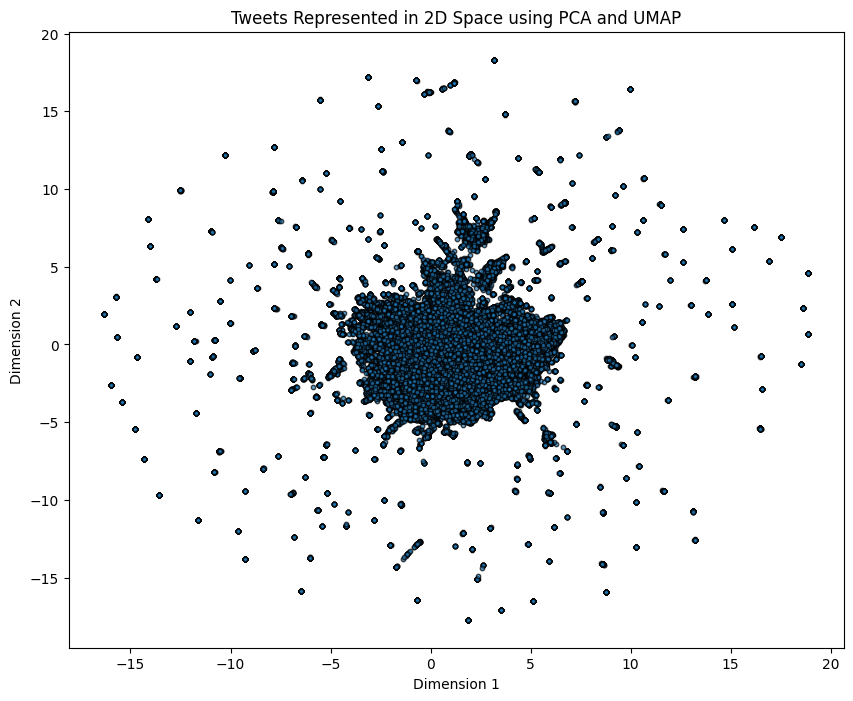

In [ ]:

# Prepare the Word2Vec model and get the average of the tweet vectors
model = Word2Vec(list(clean_tweets.values()), vector_size=50, window=5, min_count=1)
tweet_vectors = tweet_vector_avg(clean_tweets, model)

tweet_vectors = np.array(tweet_vectors)

#PCA for  dimensionality reduction
pca = PCA(n_components=50)  # Reduce to 50 principal components
tweet_vectors_pca = pca.fit_transform(tweet_vectors)

#UMAP on the PCA-reduced data
reducer = umap.UMAP(n_components=2, random_state=42)
tweet_embeddings_umap = reducer.fit_transform(tweet_vectors_pca)

plt.figure(figsize=(10, 8))
plt.scatter(tweet_embeddings_umap[:, 0], tweet_embeddings_umap[:, 1],
            s=10, alpha=0.7, edgecolors='k')
plt.title("Tweets Represented in 2D Space using PCA and UMAP")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

# **Part 3: Ranking**

## Functions

In [27]:
def min_max_scaling(tweets, doc_id, common_docs, value):
  min_value = min(tweets[id][value] for id in common_docs)
  max_value = max(tweets[id][value] for id in common_docs)

  return (tweets[doc_id][value] - min_value) / (max_value - min_value)

## TF-IDF + Cosine Similarity

In [28]:
def tfidf_cosine(query, inverted_index, total_tweets, clean_tweets):
  terms = build_terms(query)
  tweets_scores = defaultdict(float) #dictionary to store doc_id -> score
  doc_vectors = defaultdict(lambda: defaultdict(float))  # Vectors for each document TF-IDF values
  query_vector = defaultdict(float)
  common_docs = search(query, inverted_index) #we find the list of common documents for all the words of the query

  for term in terms: #for each word of the query
    if term in inverted_index:
      df = len(inverted_index[term]) # we compute df: the number of documents containing the term
      idf = np.round(np.log(total_tweets/df), 4) #we compute IDF with the formula
      term_frequency = terms.count(term)  # term frequency of the term in the QUERY
      tf = np.round(term_frequency / len(terms), 4)  # tf for the query term as term_frequency/words in the query
      query_vector[term] = tf * idf #we add it to the query vector

      for doc_id in common_docs: #for each document that conatins the query
        term_frequency = clean_tweets[doc_id].count(term)   #term frequency of the term in the document
        tf = np.round(term_frequency / len(clean_tweets[doc_id]), 4) #we compute the tf term_frequency/words in that document
        doc_vectors[doc_id][term] = tf * idf #we add it to the document vector

  for doc_id, doc_vector in doc_vectors.items():
    # Dot product between query vector and document
    tweets_scores[doc_id] = sum(query_vector[term] * doc_vector.get(term, 0) for term in query_vector) #if term not in doc_vector it returns 0

  #we order the tweet scores in descending order by score
  ranked_tweets = dict(sorted(tweets_scores.items(), key=lambda x: x[1], reverse=True))

  return ranked_tweets


In [29]:
query_1 = "indian government"
tfidf_resutls_1 = tfidf_cosine(query_1, index, len(get_tweets), clean_tweets) #documents were the query appears ranked by scores
top_20_results = list(tfidf_resutls_1.items())[:20] #we take top 20
for idx, (tweet_id, score) in enumerate(top_20_results):
    print("Top {} tweet: tweet_id = {} - score = {}".format(idx+1,tweet_id, score))
    print("\nContent: {}\n".format(get_tweets[tweet_id]['Tweet']))

Top 1 tweet: tweet_id = doc_29545 - score = 1.9905568825

Content: #FarmersProtest What a shame on Indian government. https://t.co/WgtT04W6ur

Top 2 tweet: tweet_id = doc_31188 - score = 1.9905568825

Content: The Indian government is facist #FarmersProtest

Top 3 tweet: tweet_id = doc_11484 - score = 1.9905568825

Content: Shame on Indian government #FarmersProtest https://t.co/khyXi7pNAy

Top 4 tweet: tweet_id = doc_38240 - score = 1.9905568825

Content: Shame on Indian Government 😔
#FarmersProtest https://t.co/XuLV671Gof

Top 5 tweet: tweet_id = doc_17769 - score = 1.9905568825

Content: Shame on Indian government 
#FarmersProtest https://t.co/oW61P13nXH

Top 6 tweet: tweet_id = doc_36211 - score = 1.592445506

Content: #FarmersProtest look at all the bs the Indian government is doing. https://t.co/7KOggZw8pu

Top 7 tweet: tweet_id = doc_27778 - score = 1.592445506

Content: indian government #BJP all #FarmersProtest target https://t.co/Qu3KuEkjnt

Top 8 tweet: tweet_id = doc_30422 

## Our Score + Cosine Similarity

In [30]:
def ourscore_cosine(query, inverted_index, total_tweets, clean_tweets, tweets):
  terms = build_terms(query)
  tweets_scores = defaultdict(float) #dictionary to store doc_id -> score
  doc_vectors = defaultdict(lambda: defaultdict(float))  # Vectors for each document TF-IDF values
  query_vector = defaultdict(float)
  common_docs = search(query, inverted_index) #we find the list of common documents for all the words of the query

  for term in terms: #for each word
    if term in inverted_index:
      df = len(inverted_index[term]) # we compute document frequency (DF) that is the number of documents containing the term
      idf = np.round(np.log(total_tweets/df), 4) #we compute IDF with the formula
      term_frequency = terms.count(term)  # Term frequency of the term in the query
      tf = np.round(term_frequency / len(terms), 4)  # TF for query term
      query_vector[term] = tf * idf #we add it to the query vector

      for doc_id in common_docs: #for each document that conatins the query
        term_frequency = clean_tweets[doc_id].count(term)   #term frequency of the term in the document
        tf = np.round(term_frequency / len(clean_tweets[doc_id]), 4) #we compute the tf term_frequency/words in that document
        doc_vectors[doc_id][term] = tf * idf

  for doc_id, doc_vector in doc_vectors.items():
    # Dot product between query vector and document vector
    dot_product = sum(query_vector[term] * doc_vector.get(term, 0) for term in query_vector) #if term not in doc_vector it returns 0

    num_likes = min_max_scaling(tweets, doc_id,common_docs,  'Likes')
    num_retweets = min_max_scaling(tweets, doc_id,common_docs,  'Retweets')
    is_verified = tweets[doc_id]['Verified']
    num_followers = min_max_scaling(tweets, doc_id,common_docs,  'Followers')

    if is_verified:
      tweets_scores[doc_id] = 0.6 * dot_product + 0.4 *(num_likes*0.4 + num_retweets*0.6 - num_followers * 0.3)
    else:
      tweets_scores[doc_id] = 0.6 * dot_product + 0.4 * (num_likes*0.4 + num_retweets*0.6 + num_followers * 0.3)

  #we order the tweet scores in descending order by score
  ranked_tweets = dict(sorted(tweets_scores.items(), key=lambda x: x[1], reverse=True))

  return ranked_tweets

In [ ]:
query_1 = "indian government"
ourscore_resutls_1 = ourscore_cosine(query_1, index, len(get_tweets), clean_tweets, get_tweets) #documents were the query appears ranked by scores
top_20_results = list(ourscore_resutls_1.items())[:20] #we take top 10
for idx, (tweet_id, score) in enumerate(top_20_results):
    print("Top {} tweet: tweet_id = {} - score = {}".format(idx+1,tweet_id, score))
    print("\nContent: {}\n".format(get_tweets[tweet_id]['Tweet']))

Top 1 tweet: tweet_id = doc_11484 - score = 1.1957303021054737

Content: Shame on Indian government #FarmersProtest https://t.co/khyXi7pNAy

Top 2 tweet: tweet_id = doc_31188 - score = 1.1948877505597453

Content: The Indian government is facist #FarmersProtest

Top 3 tweet: tweet_id = doc_38240 - score = 1.1948839099054072

Content: Shame on Indian Government 😔
#FarmersProtest https://t.co/XuLV671Gof

Top 4 tweet: tweet_id = doc_17769 - score = 1.1948838188226956

Content: Shame on Indian government 
#FarmersProtest https://t.co/oW61P13nXH

Top 5 tweet: tweet_id = doc_29545 - score = 1.194334296484971

Content: #FarmersProtest What a shame on Indian government. https://t.co/WgtT04W6ur

Top 6 tweet: tweet_id = doc_40124 - score = 0.9563138779654897

Content: Shame on Indian government #FarmersProtest #GoBackModi https://t.co/97vElTIDkY

Top 7 tweet: tweet_id = doc_14237 - score = 0.9562014646135094

Content: Shame on Indian government #FarmersProtest #DPstopIntimidatingFarmers https://

## BM25

In [33]:
def bm25(query, inverted_index, total_tweets, clean_tweets):
  terms = build_terms(query)
  RSV = defaultdict(float) #dictionary to store doc_id -> score
  k1 = 1.2
  b = 0.75
  avg_doc_length = np.mean([len(doc) for doc in clean_tweets.values()])
  common_docs = search(query, inverted_index) #we find the list of common documents for all the words of the query

  for term in terms: #for each word
    if term in inverted_index:
      df = len(inverted_index[term]) # we compute document frequency (DF) that is the number of documents containing the term
      idf = np.round(np.log(total_tweets/df), 4) #we compute IDF with the formula

      for doc_id in common_docs: #for each document that contains all the terms in the query
        term_frequency = clean_tweets[doc_id].count(term)   #term frequency of the term in the document
        tf = np.round(term_frequency / len(clean_tweets[doc_id]), 4) #we compute the tf term_frequency/words in that document
        # we compute tf-idf and add it to the tweet score
        RSV[doc_id] += idf * (k1 +1)*tf/(tf+k1*(1-b+b*len(clean_tweets[doc_id])/avg_doc_length))

  #we order the tweet scores in descending order by score
  ranked_tweets = dict(sorted(RSV.items(), key=lambda x: x[1], reverse=True))

  return ranked_tweets



In [34]:
query_1 = "indian government"
bm25_resutls_1 = bm25(query_1, index, len(get_tweets), clean_tweets) #documents were the query appears ranked by scores
top_20_results = list(bm25_resutls_1.items())[:20] #we take top 10
for idx, (tweet_id, score) in enumerate(top_20_results):
    print("Top {} tweet: tweet_id = {} - score = {}".format(idx+1,tweet_id, score))
    print("\nContent: {}\n".format(get_tweets[tweet_id]['Tweet']))

Top 1 tweet: tweet_id = doc_29545 - score = 3.9028930433839264

Content: #FarmersProtest What a shame on Indian government. https://t.co/WgtT04W6ur

Top 2 tweet: tweet_id = doc_31188 - score = 3.9028930433839264

Content: The Indian government is facist #FarmersProtest

Top 3 tweet: tweet_id = doc_11484 - score = 3.9028930433839264

Content: Shame on Indian government #FarmersProtest https://t.co/khyXi7pNAy

Top 4 tweet: tweet_id = doc_38240 - score = 3.9028930433839264

Content: Shame on Indian Government 😔
#FarmersProtest https://t.co/XuLV671Gof

Top 5 tweet: tweet_id = doc_17769 - score = 3.9028930433839264

Content: Shame on Indian government 
#FarmersProtest https://t.co/oW61P13nXH

Top 6 tweet: tweet_id = doc_36211 - score = 3.07862728150336

Content: #FarmersProtest look at all the bs the Indian government is doing. https://t.co/7KOggZw8pu

Top 7 tweet: tweet_id = doc_27778 - score = 3.07862728150336

Content: indian government #BJP all #FarmersProtest target https://t.co/Qu3KuE

## Top20 List of Documents

In [ ]:
# Prepare the Word2Vec model and get the average of the tweet vectors
model = Word2Vec(list(clean_tweets.values()), vector_size=50, window=5, min_count=1)

In [ ]:
def calculate_tweet_vector(model, tweet):
  tweet_vector = []
  for word in tweet:
    if word in model.wv:
      tweet_vector.append(model.wv[word])

  return np.mean(tweet_vector, axis=0)

def top20(query, model, all_tweets, inverted_index, tokens):
    ranked_docs = tfidf_cosine(query, inverted_index, len(tokens), tokens) #retrieve the relevant documents

    query_tweets_ = {}
    top = 20
    for doc_id in list(ranked_docs.items())[:20]: #for each document retrieved
        for tweet in tokens:
            if doc_id[0] == tweet:
                tweet_vectors_ = calculate_tweet_vector(model, tokens[doc_id[0]])
                query_tweets_[doc_id[0]] = tweet_vectors_ #store its vector representation and id


    #perform PCA for the tweets
    pca = PCA(n_components = 3)

    tweet_vectors_pca = pca.fit_transform(list(query_tweets_.values())) #apply the transformation

    result_pca = {doc_id: pca_vector for doc_id, pca_vector in zip(query_tweets_.keys(), tweet_vectors_pca)}

    #perform PCA for the query
    query_vector = calculate_tweet_vector(model, build_terms(query))
    query_vector_pca = pca.transform([query_vector])

    #Cosine similarity
    similarity_scores = {}
    for doc_id, tweet_vector in result_pca.items():
      similarity_scores[doc_id] = np.dot(tweet_vector, query_vector_pca.T)

    top_20_tweets = dict(sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)[:20])

    print("Ranking for query: '{}'\n".format(query))
    for idx, (key, score) in enumerate(top_20_tweets.items()):
      print("Top {} tweet: tweet_id = {} - score = {}".format(idx+1,key, score[0]))
      print("\nContent: {}\n".format(all_tweets[key]['Tweet']))



In [ ]:
top20('indian_government',model, get_tweets, index, clean_tweets)

Ranking for query: 'indian_government'

Top 1 tweet: tweet_id = doc_30422 - score = 4.864941300075832

Content: Why are Indian farmers protesting against the government?
#FarmersProtest  https://t.co/eMUGoXtabZ

Top 2 tweet: tweet_id = doc_29545 - score = 2.875853225267882

Content: #FarmersProtest What a shame on Indian government. https://t.co/WgtT04W6ur

Top 3 tweet: tweet_id = doc_11484 - score = 2.87585319211122

Content: Shame on Indian government #FarmersProtest https://t.co/khyXi7pNAy

Top 4 tweet: tweet_id = doc_38240 - score = 2.87585319211122

Content: Shame on Indian Government 😔
#FarmersProtest https://t.co/XuLV671Gof

Top 5 tweet: tweet_id = doc_17769 - score = 2.8758531921112187

Content: Shame on Indian government 
#FarmersProtest https://t.co/oW61P13nXH

Top 6 tweet: tweet_id = doc_31188 - score = 0.48235851093336113

Content: The Indian government is facist #FarmersProtest

Top 7 tweet: tweet_id = doc_14237 - score = 0.47053852178208017

Content: Shame on Indian gover

In [ ]:
top20('support farmers', model, get_tweets, index, clean_tweets)

Ranking for query: 'support farmers'

Top 1 tweet: tweet_id = doc_31878 - score = 0.7959379695833869

Content: Support farmers, support humanity #Farmersprotest

Top 2 tweet: tweet_id = doc_15877 - score = 0.12992302151554258

Content: Thank you for your support 
We support farmers
#FarmersProtest https://t.co/xJeGIrkYeP

Top 3 tweet: tweet_id = doc_43187 - score = 0.02582584305763367

Content: Support farmers support farmers support Twitter #FarmersProtest  #RepealOnlyWayAhead https://t.co/zfRr9uMx8k

Top 4 tweet: tweet_id = doc_47423 - score = -0.01594327710828683

Content: Support farmers
#MahapanchayatRevolution
#FarmersProtest
Support https://t.co/b6Ipb8C1QS

Top 5 tweet: tweet_id = doc_47396 - score = -0.015943277108286885

Content: Support farmers all
#MahapanchayatRevolution
#FarmersProtest
Support https://t.co/2Ox6j6rSO5

Top 6 tweet: tweet_id = doc_47382 - score = -0.01594327710828692

Content: We Support farmers
#MahapanchayatRevolution
#FarmersProtest
Support https://t.co/N

In [ ]:
top20('farmer protest', model, get_tweets, index, clean_tweets)

Ranking for query: 'farmer protest'

Top 1 tweet: tweet_id = doc_9676 - score = 2.266869275344588

Content: This is why Indian Farmers are protesting #FarmersProtest https://t.co/9mzFBGQaXL

Top 2 tweet: tweet_id = doc_44982 - score = 1.584970455309194

Content: Peaceful protest by farmers. 
#FarmersProtest https://t.co/BefFyvXJFv

Top 3 tweet: tweet_id = doc_19226 - score = 1.5517556628216647

Content: Farmers Protest explained #FarmersProtest 💚 https://t.co/pSVNVFs91r

Top 4 tweet: tweet_id = doc_13542 - score = 1.2645529774624418

Content: What happened to farmers protest???? #FarmersProtest

Top 5 tweet: tweet_id = doc_38587 - score = 1.2430340874747552

Content: I support farmers protest
#FarmersProtest

Top 6 tweet: tweet_id = doc_30684 - score = 1.2430340874747552

Content: We support farmers protests...
#FarmersProtest
https://t.co/UjscuczDy2

Top 7 tweet: tweet_id = doc_41627 - score = 0.6487760060234118

Content: Farmers protest in germany

#FarmersProtest https://t.co/QQrjEB

In [ ]:
top20('agricultural sector', model, get_tweets, index, clean_tweets)

Ranking for query: 'agricultural sector'

Top 1 tweet: tweet_id = doc_17426 - score = 7.321055652868755

Content: #FarmersProtest
New agricultural laws have been introduced to reform the agricultural sector. The new agricultural laws will not deprive farmers of any existing rights. #ModiWithFarmers #farmerswithmodi https://t.co/9gN86xsqWt

Top 2 tweet: tweet_id = doc_26158 - score = 5.078239757129797

Content: Agriculture was the only sector which remain positive during Covid and Government want to destroy the farming with new laws #FarmersMakeIndia #FarmersProtest

Top 3 tweet: tweet_id = doc_30887 - score = 3.3750049680789336

Content: GDP Down 
Public Job Less 
Inflation Rate High 
Petrol Price High 
Damage Agriculture Sector 
#IamAgainstModiGovt #BJPFails
#agriculture #FarmersProtest https://t.co/JUiE2DV222

Top 4 tweet: tweet_id = doc_30950 - score = 3.3750049680789322

Content: GDP Down 
Public Job Less 
Inflation Rate High 
Petrol Price High 
Damage Agriculture Sector 
#IamAgain

In [ ]:
top20('indian rights', model, get_tweets, index, clean_tweets)

Ranking for query: 'indian rights'

Top 1 tweet: tweet_id = doc_35301 - score = 5.245491556147311

Content: Indian Farmers human rights and rights to Livelihoods is a matter of concern for all of humanity. 
#IndiaBeingSilenced 
#FarmersProtest https://t.co/ifwJtC2HCs

Top 2 tweet: tweet_id = doc_43382 - score = 4.002169981460237

Content: @ClaudiaWebbe Very sad. Indian government is letting the whole India down by violating human rights. #FarmersProtest

Top 3 tweet: tweet_id = doc_30164 - score = 3.6153123478822793

Content: @UNODC Please save Indian farmers. Indian government is violating their fundamental rights 🙏🙏🙏🙏🙏🙏
#FarmersProtest https://t.co/BLDBl4umNM

Top 4 tweet: tweet_id = doc_18421 - score = 3.1815156237402755

Content: Fighting for their rights not to rule the country #FarmersProtest 
#ReleaseDetainedFarmers https://t.co/oCssteocXI #Indian_Army_Support_Farmer

Top 5 tweet: tweet_id = doc_39111 - score = 2.918300768770594

Content: Indian farmers have right to peacefull p

## Extra - Sentence to Vector

In [ ]:
from sentence_transformers import SentenceTransformer

# we load a pretrained Sentence Transformer model
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
def calculate_vector(model, tweet_tokens):
    # we join the tokens to form the sentence, and encode it using sentence trasnformer model
    return model.encode(' '.join(tweet_tokens))


def top_20_sent2vec(query, model, all_tweets, clean, inverted_index):
    # we generate the embedding fro the query
    query_vector = calculate_vector(sentence_model, build_terms(query))

    ranked_docs = tfidf_cosine(query, inverted_index, len(clean), clean) #we retrieve the relevant documents

    tweet_vectors = {}

    # we calculate sentence embeddings for each tweet in the dataset
    for doc_id in list(ranked_docs.items())[:20]: #for each document retrieved
      for tweet in clean:
        if doc_id[0] == tweet:
          tweet_vector = calculate_vector(sentence_model, clean[doc_id[0]])
          tweet_vectors[doc_id[0]] = tweet_vector

    # we compute the cosine similarity between the query and each tweet embedding
    similarity_scores = {}
    for tweet_id, tweet_vector in tweet_vectors.items():
        similarity_scores[tweet_id] = np.dot(tweet_vector, query_vector.T)

    top_20_tweets = dict(sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)[:20])

    print("Ranking for query: '{}'\n".format(query))
    for idx, (key, score) in enumerate(top_20_tweets.items()):
      print("Top {} tweet: tweet_id = {} - score = {}".format(idx+1,key, score))
      print("\nContent: {}\n".format(all_tweets[key]['Tweet']))

In [ ]:
top_20_sent2vec('indian government',sentence_model, get_tweets, clean_tweets, index)

Ranking for query: 'indian government'

Top 1 tweet: tweet_id = doc_31188 - score = 0.620319128036499

Content: The Indian government is facist #FarmersProtest

Top 2 tweet: tweet_id = doc_31710 - score = 0.5984547138214111

Content: #IamAgainstModiGovt 
#farmersprotest 
Shame on indian government https://t.co/RMwUNfYMV1

Top 3 tweet: tweet_id = doc_17769 - score = 0.5966789722442627

Content: Shame on Indian government 
#FarmersProtest https://t.co/oW61P13nXH

Top 4 tweet: tweet_id = doc_11484 - score = 0.5966789722442627

Content: Shame on Indian government #FarmersProtest https://t.co/khyXi7pNAy

Top 5 tweet: tweet_id = doc_38240 - score = 0.5966789722442627

Content: Shame on Indian Government 😔
#FarmersProtest https://t.co/XuLV671Gof

Top 6 tweet: tweet_id = doc_18946 - score = 0.593022346496582

Content: Indian government has to do better! Seriously.  #FarmersProtest

Top 7 tweet: tweet_id = doc_42096 - score = 0.5904009342193604

Content: I am appalled by the ignorance of the In

## Extra - Doc2Vec

In [ ]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
# First we train the Doc2Vec model
# we prepare the data
tagged_data = [TaggedDocument(words=tweet, tags=[str(tweet_id)]) for tweet_id, tweet in clean_tweets.items()]

# Train the Doc2Vec model
doc_model = Doc2Vec(vector_size=50, window=5, min_count=1, workers=4)
doc_model.build_vocab(tagged_data)
doc_model.train(tagged_data, total_examples=doc_model.corpus_count, epochs=10)


In [ ]:
# Step 2: Calculate tweet vectors using the trained Doc2Vec model
def get_tweet_vector(model, tweet_tokens):
    return model.infer_vector(tweet_tokens)

# Step 3: Function to rank tweets based on cosine similarity with the query
def rank_tweets_with_doc2vec(query, all_tweets, clean_tweets, model, inverted_index):
    # Convert the query to a vector using Doc2Vec
    query_vector = get_tweet_vector(model, build_terms(query))

    ranked_docs = tfidf_cosine(query, inverted_index, len(clean_tweets), clean_tweets) #we retrieve the relevant documents

    # Create a dictionary to store the tweet vectors
    tweet_vectors = {}

    # Generate vector representation for each tweet in the dataset
    for doc_id in list(ranked_docs.items())[:20]: #for each document retrieved
      for tweet in clean_tweets:
        if doc_id[0] == tweet:
          tweet_vector = get_tweet_vector(model, clean_tweets[doc_id[0]])
          tweet_vectors[doc_id[0]] = tweet_vector

    # Compute cosine similarity between the query vector and each tweet vector
    similarity_scores = {}
    for tweet_id, tweet_vector in tweet_vectors.items():
        similarity_scores[tweet_id] = np.dot(tweet_vector, query_vector.T)

    top_20_tweets = dict(sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)[:20])

    print("Ranking for query: '{}'\n".format(query))
    for idx, (key, score) in enumerate(top_20_tweets.items()):
      print("Top {} tweet: tweet_id = {} - score = {}".format(idx+1,key, score))
      print("\nContent: {}\n".format(all_tweets[key]['Tweet']))

In [ ]:
rank_tweets_with_doc2vec('indian government', get_tweets, clean_tweets, doc_model, index)

Ranking for query: 'indian government'

Top 1 tweet: tweet_id = doc_11484 - score = 0.08980347961187363

Content: Shame on Indian government #FarmersProtest https://t.co/khyXi7pNAy

Top 2 tweet: tweet_id = doc_31188 - score = 0.08381348103284836

Content: The Indian government is facist #FarmersProtest

Top 3 tweet: tweet_id = doc_31710 - score = 0.0810834988951683

Content: #IamAgainstModiGovt 
#farmersprotest 
Shame on indian government https://t.co/RMwUNfYMV1

Top 4 tweet: tweet_id = doc_8470 - score = 0.08023104816675186

Content: #farmersprotest.  @KanganaTeam @PMOIndia  shame on Indian government https://t.co/YERIeLznPS

Top 5 tweet: tweet_id = doc_17769 - score = 0.07732555270195007

Content: Shame on Indian government 
#FarmersProtest https://t.co/oW61P13nXH

Top 6 tweet: tweet_id = doc_38240 - score = 0.07576651871204376

Content: Shame on Indian Government 😔
#FarmersProtest https://t.co/XuLV671Gof

Top 7 tweet: tweet_id = doc_42096 - score = 0.07499651610851288

Content: I am